Observation Trend # 1 - Temperature increases as it approaches the equator.

Observation Trend # 2 - Humidity and windspeed(falls under 10mph) around Equator seems to be similar to the parts of it.

Observation Trend # 3 - Cloudiness seems well spread out for this day.


In [399]:
#Import Dependencies
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import openweathermapy.core as owm
from citipy import citipy
from conf import api_key 
from random import uniform 

In [401]:
# Used citipy to associate them with nearest city
location = pd.DataFrame()
location['lat'] = [uniform(-90,90) for x in range(1400)]
location['lng'] = [uniform(-180, 180) for x in range(1400)]
location['Closest City'] = " "
location['Country code'] = " " 
for index,row in location.iterrows():
    city = citipy.nearest_city(row["lat"],row["lng"])
    location.set_value(index,"Closest City",city.city_name)
    location.set_value(index,"Country code",city.country_code.upper()) 
location.head()

,lat,lng,Closest City,Country code
0,-34.145215,-47.603838,cidreira,BR
1,-59.135368,52.842476,taolanaro,MG
2,-81.153149,140.581318,hobart,AU
3,73.853839,166.766659,pevek,RU
4,19.282787,70.329105,kodinar,IN


In [402]:
# Duplicates are dropped from closest city and stored in a variable "locat"
locat = location.drop_duplicates(['Closest City'])

In [403]:
# Duplicates are dropped from Country code : for looping to get country count
loct = location.drop_duplicates(['Country code'])

In [404]:
# base url 
base_url = "http://api.openweathermap.org/data/2.5/weather"

In [405]:
# Looping through cities and country code to get counts of Set ID and records
counter_city = 0
for indx,rw in loct.iterrows():
    counter_city = counter_city + 1
    counter_country = 0
    for index,row in locat.iterrows():
        if rw['Country code'] == row['Country code']:
            counter_country = counter_country + 1
            print(f"Processing Records {counter_city} of Set {counter_country} | {row['Closest City']}")
            
            # set up a parameters dictionary
            params = {"units":"Imperial", "APPID" :api_key, "q" :row["Closest City"]}
            
            # run a request using our params dictionary 
            city_weather_resp = requests.get(base_url,params)
            print(city_weather_resp.url)
            
            # convert response to json
            city_weather_res  = city_weather_resp.json() 
            locat.set_value(index,"Lat",city_weather_res.get("coord",{}).get("lat"))
            locat.set_value(index,"Lng",city_weather_res.get("coord",{}).get("lon"))
            locat.set_value(index,"Temperature",city_weather_res.get("main",{}).get("temp_max"))
            locat.set_value(index,"Wind speed",city_weather_res.get("wind",{}).get("speed"))
            locat.set_value(index,"Humidity",city_weather_res.get("main",{}).get("humidity"))
            locat.set_value(index,"Cloudiness",city_weather_res.get("clouds",{}).get("all")) 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Records 1 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=cidreira


C:\Users\Saranya\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Saranya\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Processing Records 1 of Set 2 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=touros
Processing Records 1 of Set 3 | morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=morros
Processing Records 1 of Set 4 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=cabedelo
Processing Records 1 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=arraial+do+cabo
Processing Records 1 of Set 6 | ariquemes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=ariquemes
Processing Records 1 of Set 7 | cacoal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=cacoal
Processing Records 1 of Set 8 | sao miguel do oeste
http://api.openweathermap.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=yulara
Processing Records 3 of Set 22 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=port+hedland
Processing Records 3 of Set 23 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=yeppoon
Processing Records 3 of Set 24 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=roma
Processing Records 3 of Set 25 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=mount+gambier
Processing Records 3 of Set 26 | mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=mildura
Processing Records 3 of Set 27 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=ordynskoye
Processing Records 4 of Set 48 | verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=verkhnyaya+inta
Processing Records 4 of Set 49 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=yerbogachen
Processing Records 4 of Set 50 | gryazovets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=gryazovets
Processing Records 4 of Set 51 | timiryazevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=timiryazevskiy
Processing Records 4 of Set 52 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=iskateley
Processing Records 4 of Set 53 | bolshaya martynovka
http://api.openweathermap

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=east+london
Processing Records 6 of Set 4 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=port+elizabeth
Processing Records 6 of Set 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=saldanha
Processing Records 6 of Set 6 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=cape+town
Processing Records 6 of Set 7 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=kruisfontein
Processing Records 6 of Set 8 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=margate
Processing Records 6 of Set 9 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperi

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=valdosta
Processing Records 10 of Set 23 | tucumcari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=tucumcari
Processing Records 10 of Set 24 | klamath falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=klamath+falls
Processing Records 10 of Set 25 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=lompoc
Processing Records 10 of Set 26 | dillon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=dillon
Processing Records 10 of Set 27 | gonzales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=gonzales
Processing Records 10 of Set 28 | mount vernon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=port+hardy
Processing Records 16 of Set 22 | nipawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=nipawin
Processing Records 16 of Set 23 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=smithers
Processing Records 16 of Set 24 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=sept-iles
Processing Records 16 of Set 25 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=port+hawkesbury
Processing Records 17 of Set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=qaanaaq
Processing Records 17 of Set 2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?uni

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=porto+novo
Processing Records 28 of Set 1 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=san+patricio
Processing Records 28 of Set 2 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=guerrero+negro
Processing Records 28 of Set 3 | sayula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=sayula
Processing Records 28 of Set 4 | imuris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=imuris
Processing Records 28 of Set 5 | san blas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=san+blas
Processing Records 28 of Set 6 | tayoltita
http://api.openweathermap.org/data/2.5/weather?units=Imperial

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=christchurch
Processing Records 37 of Set 7 | takaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=takaka
Processing Records 37 of Set 8 | hastings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=hastings
Processing Records 37 of Set 9 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=tuatapere
Processing Records 37 of Set 10 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=russell
Processing Records 37 of Set 11 | southbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=southbridge
Processing Records 37 of Set 12 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=gazanjyk
Processing Records 50 of Set 1 | pachino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=pachino
Processing Records 51 of Set 1 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=mrirt
Processing Records 51 of Set 2 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=nador
Processing Records 52 of Set 1 | tatawin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=tatawin
Processing Records 53 of Set 1 | morehead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=morehead
Processing Records 53 of Set 2 | madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=san+vicente+de+canete
Processing Records 66 of Set 7 | abancay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=abancay
Processing Records 67 of Set 1 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=henties+bay
Processing Records 67 of Set 2 | arandis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=arandis
Processing Records 67 of Set 3 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=luderitz
Processing Records 68 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=airai
Processing Records 69 of Set 1 | sebeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=pouembout
Processing Records 100 of Set 2 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=vao
Processing Records 101 of Set 1 | nagyszenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=nagyszenas
Processing Records 102 of Set 1 | mpigi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=mpigi
Processing Records 103 of Set 1 | toktogul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=toktogul
Processing Records 103 of Set 2 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261fe95765cf52336&q=ozgon
Processing Records 104 of Set 1 | tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11cb939beaa584f261f

In [406]:
# Drop cities with missing information
locat = locat[pd.notnull(locat['Temperature'])]
counter_city = 0
locat['Date'] = ""
for indx,rw in loct.iterrows():
    
    counter_city = counter_city + 1
    counter_country = 0
    for index,row in locat.iterrows():

        if rw['Country code'] == row['Country code']:
            params = {"units":"Imperial", "APPID" :api_key, "q" :row["Closest City"]}
            
            # run a request using our params dictionary 
            city_weather_resp = requests.get(base_url,params)
            
            # convert response to json
            city_weather_res  = city_weather_resp.json() 
            
            # Loop for calculating the date after excluding the NAN valuea
            locat.set_value(index, 'Date', int(city_weather_res['dt'])) 
            

In [412]:
locat.count()

Closest City    505
Country code    505
Lat             505
Lng             505
Temperature     505
Wind speed      505
Humidity        505
Cloudiness      505
Date            505
dtype: int64

In [440]:
locat.head()

,Closest City,Country code,Lat,Lng,Temperature,Wind speed,Humidity,Cloudiness,Date
0,cidreira,BR,-30.17,-50.22,62.32,6.29,92.0,0.0,1520589019
2,hobart,AU,-42.88,147.33,62.60,9.17,77.0,75.0,1520587800
3,pevek,RU,69.70,170.27,-8.47,29.10,98.0,44.0,1520589043
4,kodinar,IN,20.79,70.70,95.39,5.95,26.0,0.0,1520589075
5,port alfred,ZA,-33.59,26.89,67.76,8.75,87.0,0.0,1520589079


In [418]:
# Converting the date using datetime function
current_date = pd.to_datetime(locat['Date'][0], unit='s')

#Exporting the data to csv
locat.to_csv("City_Weather_data.csv")
current_date

Timestamp('2018-03-09 09:50:19')

In [419]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim) 

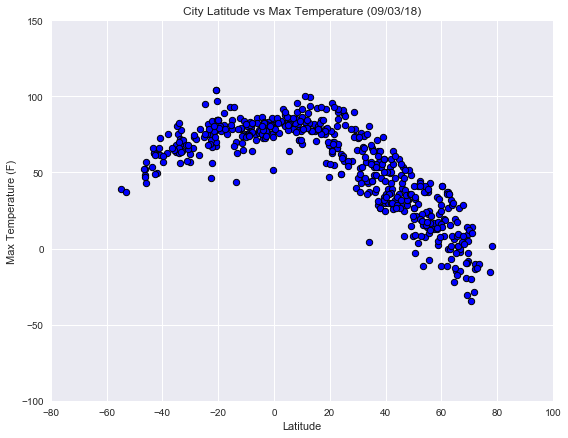

In [436]:
# Latitude vs Temperature 
locat.plot(kind="scatter",x="Lat",y="Temperature",grid=True,color="blue",edgecolors="black",linewidth='1',s=40) 
set_plot_prop("Latitude",[-80,100],"Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (09/03/18)")
plt.ylim(-100,150)
plt.savefig("Temperature vs Latitude")
sns.set(rc={'figure.figsize':(9,7)})
plt.show()

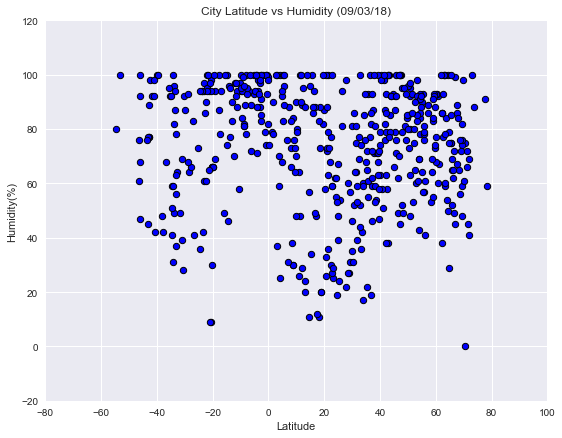

In [437]:
# Latitude vs Humidity
locat.plot(kind="scatter",x="Lat",y="Humidity",grid=True,color="blue",edgecolor="black",linewidth='1',s=40)
set_plot_prop("Latitude",[-80,100],"Humidity(%)")
plt.title("City Latitude vs Humidity (09/03/18)")
plt.ylim(-20,120)
sns.set(rc={'figure.figsize':(9,7)})
plt.savefig("Humidity vs Latitude")
plt.show()

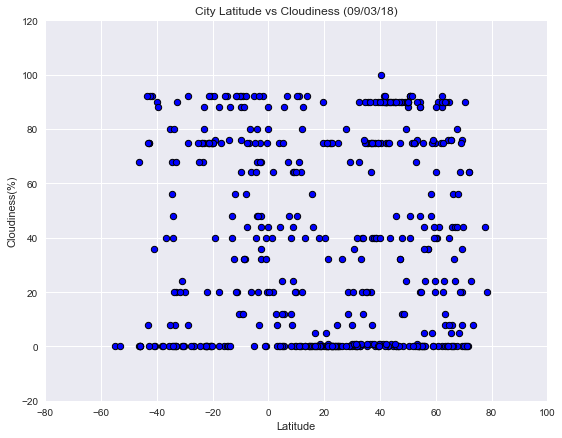

In [438]:
# Latitude vs Cloudiness
locat["Cloudiness"] = pd.to_numeric(locat["Cloudiness"])
locat.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,color="blue",edgecolor="black",linewidth='1',s=40)
set_plot_prop("Latitude",[-80,100],"Cloudiness(%)")
plt.title("City Latitude vs Cloudiness (09/03/18)")
plt.ylim(-20,120)
sns.set(rc={'figure.figsize':(9,7)})
plt.savefig("Cloudiness vs Latitude")
plt.show() 

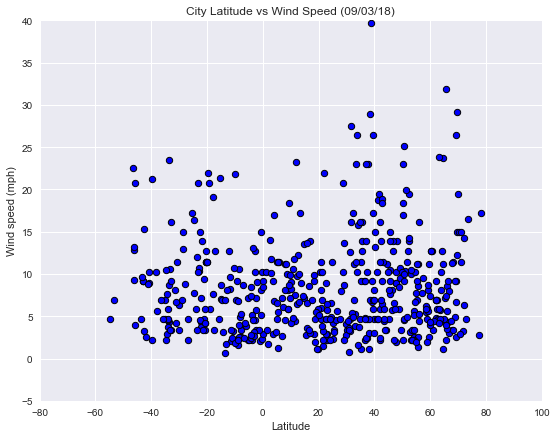

In [439]:
# Latitude vs Wind Speed
locat["Wind speed"] = pd.to_numeric(locat["Wind speed"])
locat.plot(kind="scatter",x="Lat",y="Wind speed",grid=True,color="blue",edgecolor="black",linewidth='1',s=40)
set_plot_prop("Latitude",[-80,100],"Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (09/03/18)")
plt.ylim(-5,40)
sns.set(rc={'figure.figsize':(9,7)})
plt.savefig("Wind speed vs Latitude")
plt.show() 